In [1]:
# Add the path of the main directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import sys
import os
import json
import pickle
import random
import numpy as np

from vqa_api.PythonHelperTools.vqaTools.vqa import VQA
from skip_thoughts import skipthoughts
from nearest_neighbors import NearestNeighbors

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tools import img_dir, img_file

import keras
from keras.layers import Dense, Dropout, LSTM, multiply
from keras.layers.embeddings import Embedding
from keras.utils import plot_model
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


In [3]:
%load_ext autoreload

%autoreload 2

In [4]:
#dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
dataDir = r"/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset"

In [5]:
embedding = NearestNeighbors(dataDir, n_train=300)

/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset/Annotations/mscoco_train2014_annotations.json
--> train2014
loading VQA annotations and questions into memory...
0:00:14.815531
creating index...
index created!
Loading model parameters...
Compiling encoders...
Loading tables...
Packing up...


In [6]:
embedding.encode_train_questions()

  0%|          | 0/12 [00:00<?, ?it/s]

4


  8%|▊         | 1/12 [00:00<00:08,  1.36it/s]

5


 17%|█▋        | 2/12 [00:01<00:05,  1.90it/s]

6


 25%|██▌       | 3/12 [00:01<00:04,  1.82it/s]

7


 33%|███▎      | 4/12 [00:02<00:04,  1.86it/s]

8


 42%|████▏     | 5/12 [00:02<00:03,  1.80it/s]

9


 50%|█████     | 6/12 [00:03<00:03,  1.81it/s]

10


 58%|█████▊    | 7/12 [00:03<00:02,  1.89it/s]

11


 67%|██████▋   | 8/12 [00:04<00:02,  1.91it/s]

12


 75%|███████▌  | 9/12 [00:04<00:01,  2.01it/s]

13


 92%|█████████▏| 11/12 [00:04<00:00,  2.23it/s]

14
16


100%|██████████| 12/12 [00:05<00:00,  2.29it/s]


In [7]:
# We have embedded 300 train questions
embedding.vectors_train.shape
# embedding.vectors_train_idx_to_qid

(300, 4800)

In [8]:
embedding.encode_test_questions(n_test=300)

loading VQA annotations and questions into memory...
0:00:06.670108
creating index...
index created!


  0%|          | 0/14 [00:00<?, ?it/s]

4


  7%|▋         | 1/14 [00:00<00:03,  3.78it/s]

5


 14%|█▍        | 2/14 [00:00<00:03,  3.35it/s]

6


 21%|██▏       | 3/14 [00:01<00:03,  2.78it/s]

7


 29%|██▊       | 4/14 [00:01<00:04,  2.36it/s]

8


 36%|███▌      | 5/14 [00:02<00:04,  2.22it/s]

9


 43%|████▎     | 6/14 [00:02<00:03,  2.32it/s]

10


 50%|█████     | 7/14 [00:02<00:02,  2.45it/s]

11


 57%|█████▋    | 8/14 [00:03<00:02,  2.47it/s]

12


 64%|██████▍   | 9/14 [00:03<00:01,  2.56it/s]

13


 79%|███████▊  | 11/14 [00:03<00:01,  2.78it/s]

15
16


 93%|█████████▎| 13/14 [00:04<00:00,  3.01it/s]

17
19


100%|██████████| 14/14 [00:04<00:00,  3.09it/s]


In [9]:
embedding.vectors_test.shape

(300, 4800)

In [10]:
A = embedding.nearest_neighbors()

In [11]:
A

{21420: array([ 827592, 3377262, 4670630, 2333812]),
 21421: array([2139631, 4239642, 2080110,  734610]),
 21422: array([ 810741,  810740, 2249751, 3672591]),
 24770: array([3377260,   61070, 1217311, 5201120]),
 24771: array([ 827590, 1217311, 3377260, 3823162]),
 24772: array([1297261, 3377262, 2456092, 4646050]),
 35010: array([5339570, 4889620, 3037031, 4918881]),
 35011: array([3672591, 4918882, 3823160, 2249751]),
 35012: array([4800822,  208571, 4852470, 1638180]),
 86470: array([2620981, 5760720, 1217312, 5479381]),
 86471: array([3716470, 4974941, 1317801, 3037031]),
 86472: array([5585670, 5479382, 5228202, 2710380]),
 96990: array([1150050, 5016471, 4646051, 2597210]),
 96991: array([5585671, 5228202, 4239642,  281090]),
 96992: array([4646051, 2249751, 5697232,  810741]),
 264480: array([4646050, 5231861, 4974940, 1317802]),
 264481: array([4044861, 2794012, 3011090, 5201120]),
 264482: array([3672592, 4617010,    7970, 2678312]),
 360120: array([4646051, 2336470, 3623632, 

For each question id in the test set, we get the 4 most similar questions in the train set. 

In [12]:
# Let's check the embeddings for a specific question from the test set
question_id_test = random.choice(embedding.vectors_test_idx_to_qid.values())
print(question_id_test)

3506231


In [13]:
# Corresponding question to the above question id
[d["question"] for d in embedding.questions_test if d["question_id"] == question_id_test]

[u'What has been upcycled to make lights?']

In [14]:
# Nearest questions from the train set
[d["question"] for i in range(4) 
 for d in embedding.questions_train 
 if d["question_id"] == A[question_id_test][i]]

[u'What is on top of the SUV?',
 u'What is on the wall?',
 u'What is in the frame over the bed?',
 u'What is the main color of this pic?']

# Embedding images

In [15]:
embedding.encode_train_images()

100%|██████████| 100/100 [00:01<00:00, 82.74it/s]


In [16]:
embedding.encode_test_images()

100%|██████████| 100/100 [00:01<00:00, 85.50it/s]


In [17]:
_, topImages, sorted_topImages = embedding.top_images()

In [18]:
topImages #question ID to top_image

{21420: 467063,
 21421: 73461,
 21422: 224975,
 24770: 337726,
 24771: 337726,
 24772: 337726,
 35010: 533957,
 35011: 491888,
 35012: 20857,
 86470: 121731,
 86471: 131780,
 86472: 271038,
 96990: 501647,
 96991: 522820,
 96992: 224975,
 264480: 464605,
 264481: 279401,
 264482: 267831,
 360120: 279401,
 360121: 501867,
 360122: 208011,
 425340: 430621,
 425341: 175121,
 425342: 279401,
 562050: 293822,
 562051: 423964,
 562052: 224975,
 586550: 62662,
 586551: 558567,
 586552: 62662,
 592950: 129726,
 592951: 119618,
 592952: 233647,
 649740: 224975,
 649741: 233381,
 649742: 233381,
 650080: 401720,
 650081: 6107,
 650082: 131780,
 652270: 293822,
 652271: 224975,
 652272: 267831,
 664910: 238203,
 664911: 259721,
 664912: 47386,
 763840: 303703,
 763841: 303703,
 763842: 213963,
 797210: 262495,
 797211: 464605,
 797212: 115005,
 840180: 501867,
 840181: 367259,
 840182: 121731,
 851440: 547938,
 851441: 233647,
 851442: 238203,
 868480: 303703,
 868481: 567121,
 868482: 20857,
 96

In [19]:
#dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
dataDir = r"/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset"
versionType = '' # this should be '' when using VQA v1.0 dataset
taskType    = 'OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' 
                          # or 'MultipleChoice' for v1.0
dataType    = 'mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 
                        # 'abstract_v002' for abstract for v1.0.
#annFile     = '%s/Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, dataType, dataSubType)
#quesFile    = '%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, taskType, dataType, dataSubType)
imgDir      = '%s/Images/%s' %(dataDir, dataType)
train_qID_to_imgID={dic["question_id"]:dic["image_id"] for dic in embedding.questions_train}
test_qID_to_imgID = {dic["question_id"]:dic["image_id"] for dic in embedding.questions_test}

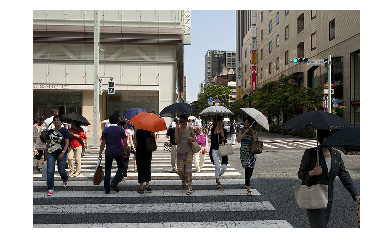

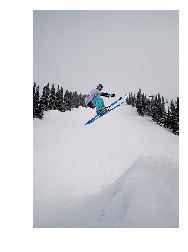

In [20]:
import skimage.io as io
import matplotlib.pyplot as plt
qID = np.random.choice(topImages.keys())
imgID = test_qID_to_imgID[qID]
topImgID = topImages[qID]
imgFileName = 'COCO_' + 'val2014' + '_'+ str(imgID).zfill(12) + '.jpg'
topImgFileName = 'COCO_' + 'train2014' + '_'+ str(topImgID).zfill(12) + '.jpg'

# plot image from val
I = io.imread('%s/val2014/'%(imgDir) + imgFileName)
plt.imshow(I)
plt.axis('off')
plt.show()

# nearest image from train
I = io.imread('%s/train2014/'%(imgDir) + topImgFileName)
plt.imshow(I)
plt.axis('off')
plt.show()

# Predictions

In [33]:
embedding.predict("val2014")

loading VQA annotations and questions into memory...
0:00:05.961976
creating index...
index created!
--> Saving the results


In [34]:
# Name of the baseline method used
method_name = embedding.__class__.__name__
dataSubType = 'val2014'
fileTypes   = ['results', 'accuracy', 'evalQA', 'evalQuesType', 'evalAnsType']

[resFile, accuracyFile, evalQAFile, evalQuesTypeFile, evalAnsTypeFile] = \
['%s/Results/%s%s_%s_%s_%s_%s.json'%(dataDir, versionType, taskType, dataType, dataSubType, \
method_name, fileType) for fileType in fileTypes] 
print("{} results file:".format(method_name), resFile)

('NearestNeighbors results file:', '/Users/adib/Documents/Cours/Projet/OR/VQA/vqa_dataset/Results/OpenEnded_mscoco_val2014_NearestNeighbors_results.json')


In [36]:
vqa = embedding.vqa_test
vqaRes = vqa.loadRes(resFile, embedding.quesFile_test)
#vqaEval = VQAEval(vqa, vqaRes, n=2)  

Loading and preparing results...     


AssertionError: Results do not correspond to current VQA set. Either the results do not have predictions for all question ids in annotation file or there is atleast one question id that does not belong to the question ids in the annotation file.

In [ ]:
# Evaluate results
vqaEval.evaluate() 

# Print accuracies
print("\n")
print("Overall Accuracy is: %.02f\n" %(vqaEval.accuracy['overall']))
print("Per Question Type Accuracy is the following:")
for quesType in vqaEval.accuracy['perQuestionType']:
    print("%s : %.02f" %(quesType, vqaEval.accuracy['perQuestionType'][quesType]))
print("\n")
print("Per Answer Type Accuracy is the following:")
for ansType in vqaEval.accuracy['perAnswerType']:
    print("%s : %.02f" %(ansType, vqaEval.accuracy['perAnswerType'][ansType]))
print("\n")